In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail/prod_cat_info.csv
/kaggle/input/retail/Customer.csv
/kaggle/input/retail/Transactions.csv


In [2]:
customer =  pd.read_csv('/kaggle/input/retail/Customer.csv')
transaction =  pd.read_csv('/kaggle/input/retail/Transactions.csv')
prodinfo =  pd.read_csv('/kaggle/input/retail/prod_cat_info.csv')

In [3]:
customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [4]:
customer=customer.dropna()
transaction=transaction.dropna()


In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [6]:
prodinfo.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [7]:
prodinfo.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [8]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [9]:
prodinfo.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [10]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [11]:
customer=customer.drop_duplicates()
transaction=transaction.drop_duplicates()

In [12]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5643 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5643 non-null   int64  
 1   DOB          5643 non-null   object 
 2   Gender       5643 non-null   object 
 3   city_code    5643 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 220.4+ KB


In [13]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23040 non-null  int64  
 1   cust_id           23040 non-null  int64  
 2   tran_date         23040 non-null  object 
 3   prod_subcat_code  23040 non-null  int64  
 4   prod_cat_code     23040 non-null  int64  
 5   Qty               23040 non-null  int64  
 6   Rate              23040 non-null  int64  
 7   Tax               23040 non-null  float64
 8   total_amt         23040 non-null  float64
 9   Store_type        23040 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly

In [14]:
prod_concat = pd.merge(left=transaction, right=prodinfo,on=["prod_cat_code","prod_subcat_code"],how="left")

In [15]:
#pd.merge(df1, df2, left_on='left_column_name', right_on='right_column_name')prod_concat = pd.merge(left=transaction, right=prod_info,on=["prod_cat_code","prod_subcat_code"],how="left")

In [16]:
prod_concat.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY


In [17]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [18]:
customer_final = pd.merge(prod_concat,customer, left_on="cust_id", right_on="customer_Id", how="left")


In [19]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351.0,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384.0,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420.0,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509.0,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420.0,27-07-1992,M,8.0


In [20]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23039
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23040 non-null  int64  
 1   cust_id           23040 non-null  int64  
 2   tran_date         23040 non-null  object 
 3   prod_subcat_code  23040 non-null  int64  
 4   prod_cat_code     23040 non-null  int64  
 5   Qty               23040 non-null  int64  
 6   Rate              23040 non-null  int64  
 7   Tax               23040 non-null  float64
 8   total_amt         23040 non-null  float64
 9   Store_type        23040 non-null  object 
 10  prod_cat          23040 non-null  object 
 11  prod_subcat       23040 non-null  object 
 12  customer_Id       23023 non-null  float64
 13  DOB               23023 non-null  object 
 14  Gender            23023 non-null  object 
 15  city_code         23023 non-null  float64
dtypes: float64(4), int64(6), object(6)
memor

Changing the DOB to datetime

In [21]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")

In [22]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23039
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  object        
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23023 non-null  float64       
 13  DOB               23023 non-null  datetime64[ns]
 14  Gender            2302

Converting tran_date to date and time format

In [23]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])

2. Prepare a summary report for the merged data set.

    a. Get the column names and their corresponding data types

 b. Top/Bottom 10 observations


In [24]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351.0,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384.0,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420.0,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509.0,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420.0,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357.0,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667.0,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489.0,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108.0,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014.0,1979-11-27,F,3.0


In [25]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23030,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982.0,1976-08-10,M,8.0
23031,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982.0,1991-10-12,M,4.0
23032,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031.0,1980-01-17,F,8.0
23033,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049.0,1975-06-28,F,6.0
23034,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866.0,1974-04-18,M,4.0
23035,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550.0,1972-02-21,M,7.0
23036,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022.0,1984-04-27,M,9.0
23037,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020.0,1976-06-20,M,8.0
23038,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911.0,1970-05-22,M,2.0
23039,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961.0,1982-01-15,M,1.0


In [26]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23039
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23023 non-null  float64       
 13  DOB               23023 non-null  datetime64[ns]
 14  Gender            2302

In [27]:
customer_final.describe( include = ['float64','int64' ])

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23023.000000,23023.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271023.477479,5.483734
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.354328,2.863422
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268937.000000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270981.000000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273115.500000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [28]:
def func_descriptives( x ):
    return pd.Series( [ x.min(),x.quantile(0.25), x.median(),x.quantile(0.75),x.max()],
                    index = ['min', 'Q1', 'median' , 'Q3', 'max']) 

In [29]:
customer_final.select_dtypes(include=['float64','int64'],exclude='object').apply( lambda x: func_descriptives(x) )

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
min,3.268991e+06,266783.00,1.0,1.0,-5.0,-1499.0,7.3500,-8270.925,266783.0,1.0
Q1,2.493315e+10,268935.00,3.0,2.0,1.0,312.0,98.2800,762.450,268937.0,3.0
median,5.009188e+10,270980.50,5.0,4.0,3.0,710.0,199.0800,1756.950,270981.0,5.0
Q3,7.532632e+10,273114.25,10.0,5.0,4.0,1109.0,365.7675,3570.255,273115.5,8.0
max,9.998755e+10,275265.00,12.0,6.0,5.0,1500.0,787.5000,8287.500,275265.0,10.0


d. Frequency tables for all the categorical variables

In [30]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23023
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11798


In [31]:
customer_final.value_counts()

transaction_id  cust_id  tran_date   prod_subcat_code  prod_cat_code  Qty  Rate  Tax      total_amt  Store_type      prod_cat          prod_subcat  customer_Id  DOB         Gender  city_code
3268991         272172   2011-02-08  11                6              3    91    28.665   301.665    e-Shop          Home and kitchen  Bath         272172.0     1975-09-17  M       10.0         1
66630359841     273191   2012-12-25  4                 1              1    1330  139.650  1469.650   Flagship store  Clothing          Mens         273191.0     1989-11-16  M       1.0          1
66769817332     267828   2014-01-28  3                 1              5    100   52.500   552.500    TeleShop        Clothing          Kids         267828.0     1976-05-07  M       3.0          1
66765685536     270663   2011-07-30  5                 3              4    1120  470.400  4950.400   MBR             Electronics       Computers    270663.0     1981-04-04  M       10.0         1
66758821488     272088   

In [32]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351.0,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384.0,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420.0,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509.0,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420.0,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550.0,1972-02-21,M,7.0
23036,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022.0,1984-04-27,M,9.0
23037,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020.0,1976-06-20,M,8.0
23038,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911.0,1970-05-22,M,2.0


In [33]:
for i in customer_final.columns:
      if customer_final[i].dtype=='object':
            print(customer_final[i].value_counts())

e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64
Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64
Women                  3046
Mens                   2910
Kids                   1997
Tools                  1061
Fiction                1043
Kitchen                1036
Children               1035
Mobiles                1030
Comics                 1030
Bath                   1022
Furnishing             1007
Non-Fiction            1003
DIY                     989
Cameras                 985
Personal Appliances     970
Academic                966
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64
M    11798
F    11225
Name: Gender, dtype: int64



3. Generate histograms for all continuous variables and frequency bars for categorical variables.


In [34]:
#stores.TotalSales.plot( kind = 'hist', grid = True )
#plt.xlabel( 'Bins' )
#plt.show()

#plt.grid(True)
#plt.hist( stores.TotalSales )
#plt.xlabel( 'Bins' )
#plt.ylabel( 'frequency' )
#plt.title( 'This is an example of a histogram' )
#plt.show()

#stores.TotalSales.hist()
#plt.show()

In [35]:
#customer_final.select_dtypes(include=['float64','int64'],exclude='object').hist()
#plt.show()

In [36]:
def func_hist(x):
    plt.title( ' This is a hist for ' + x.name )
    x.hist()
    plt.show()

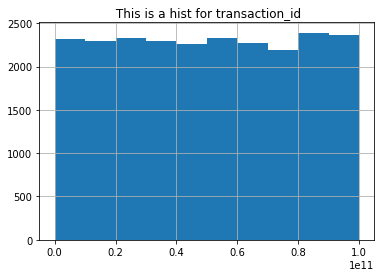

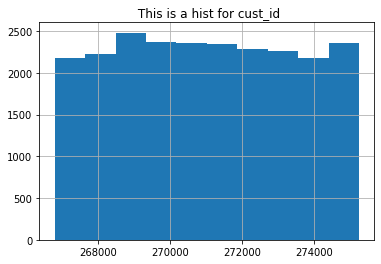

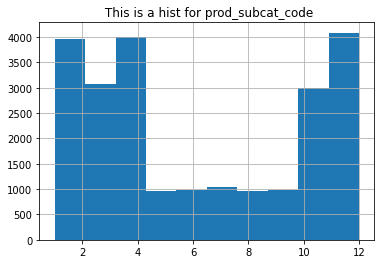

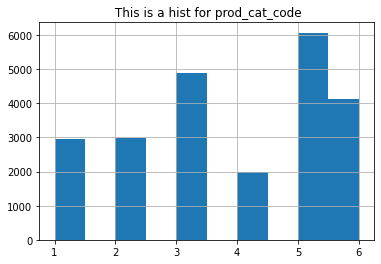

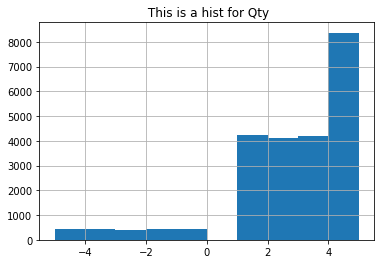

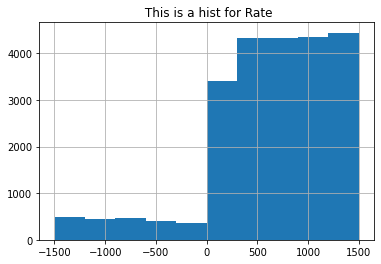

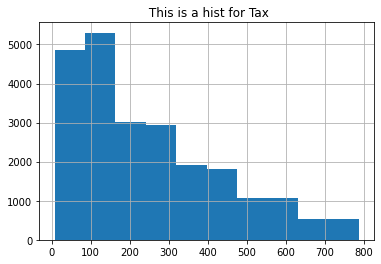

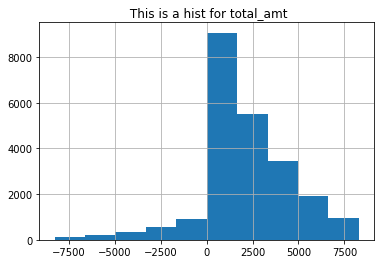

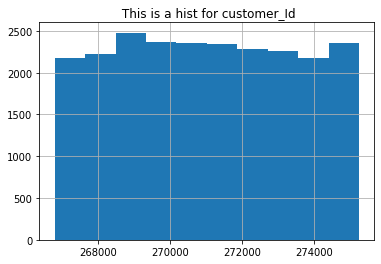

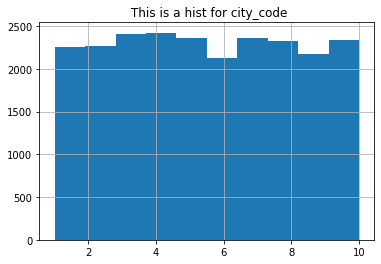

In [37]:
customer_final.select_dtypes(['int64','float64']).apply( func_hist )
plt.show()

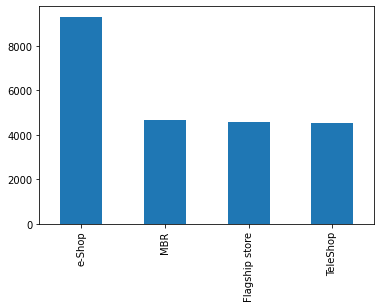

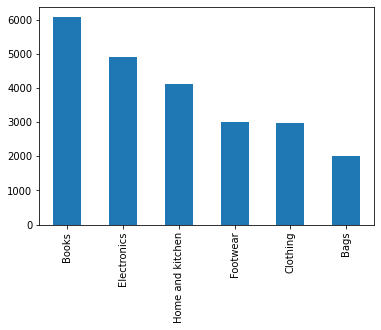

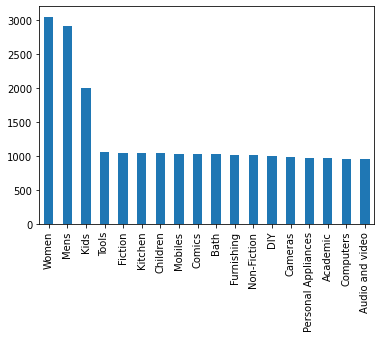

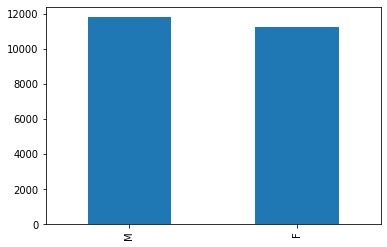

In [38]:
for i in customer_final.columns:
    if customer_final[i].dtype=='object':
        customer_final[i].value_counts().plot(kind = 'bar')
        plt.show()
    

4. Calculate the following information using the merged dataset :
 a. Time period of the available transaction data
 b. Count of transactions where the total amount of transaction was negative

In [39]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351.0,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384.0,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420.0,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509.0,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420.0,1992-07-27,M,8.0


In [40]:
max_t=customer_final.tran_date.max()
min_t=customer_final.tran_date.min()

In [41]:
print(pd.Timestamp.strftime(min_t,format="%d-%m-%Y") +' to ' + pd.Timestamp.strftime(max_t,format="%d-%m-%Y"))

02-01-2011 to 02-12-2014


In [42]:
customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()

2164


5. Analyze which product categories are more popular among females vs male customers.

In [43]:
pg=customer_final.groupby(['prod_cat','Gender']).Qty.sum().reset_index()

In [44]:
pg

,prod_cat,Gender,Qty
0,Bags,F,2364
1,Bags,M,2345
2,Books,F,7080
3,Books,M,7586
4,Clothing,F,3425
5,Clothing,M,3748
6,Electronics,F,5827
7,Electronics,M,6480
8,Footwear,F,3721
9,Footwear,M,3561


In [45]:
pg.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5827,3721,4898
M,2345,7586,3748,6480,3561,5046


6. Which City code has the maximum customers and what was the percentage of customers from
that city?

In [46]:
df=customer_final.city_code.value_counts().reset_index()

In [47]:
df

,index,city_code
0,4.0,2422
1,3.0,2410
2,5.0,2357
3,7.0,2356
4,10.0,2333
5,8.0,2328
6,2.0,2263
7,1.0,2255
8,9.0,2176
9,6.0,2123


In [48]:
(df.city_code.head(1)/df.city_code.sum())*100

0    10.519915
Name: city_code, dtype: float64

7. Which store type sells the maximum products by value and by quantity?

In [49]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23039
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23023 non-null  float64       
 13  DOB               23023 non-null  datetime64[ns]
 14  Gender            2302

In [50]:
customer_final.groupby('Store_type')['Rate','Qty'].sum().sort_values(by="Qty",ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Rate,Qty
Store_type,,
e-Shop,5945770,22790
MBR,2953665,11195
Flagship store,2942874,11142
TeleShop,2836359,10993





8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?

In [51]:
customer_final.loc[((customer_final.prod_cat=='Clothing') | (customer_final.prod_cat=='Electronics'))&(customer_final.Store_type=='Flagship store')].total_amt.sum()

3409559.27


9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [52]:
customer_final.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women,270351.0,1981-09-26,M,5.0


In [53]:
customer_final.loc[(customer_final.Gender=='M') & (customer_final.prod_cat=='Electronics')].total_amt.sum()

5705871.925


10. How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?

First we remove the transactions which have negative amounts

In [54]:
positive_data=customer_final[customer_final.total_amt>0]

In [55]:
positive_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384.0,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750.0,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023.0,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345.0,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799.0,1979-06-27,M,9.0


In [56]:
unique_trans = positive_data.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [57]:
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783.0,Books,Non-Fiction,1
1,266783.0,Clothing,Mens,2
2,266783.0,Footwear,Mens,1
3,266784.0,Books,Fiction,1
4,266784.0,Books,Non-Fiction,1
...,...,...,...,...
19257,275264.0,Books,Non-Fiction,1
19258,275264.0,Home and kitchen,Tools,1
19259,275265.0,Bags,Mens,1
19260,275265.0,Books,Academic,1


In [58]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [59]:
unique_trans_count[unique_trans_count.transaction_id>10]

,customer_Id,transaction_id


There are no customer who have more than 10 unique transaction


11. For all customers aged between 25 - 35, find out:
 a. What was the total amount spent for “Electronics” and “Books” product categories?
 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [60]:
now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%m%d%y')    # 1
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')

In [61]:
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [62]:
customer_25_35 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [63]:
customer_25_35.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          3196250.07
         Electronics    2913149.07
Name: total_amt, dtype: float64

In [64]:
customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2)

6109399.14

In [65]:
customer_total_amount_25_35 = customer_final[customer_final['Age_cat']=='25-35']